___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [59]:
df0 = pd.read_csv("Churn_Modelling.csv")
df = df0.copy()

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.shape

(10000, 14)

In [6]:
df.Surname.nunique()

2932

In [7]:
df.CustomerId.nunique()

10000

In [8]:
df.duplicated().sum()

0

In [9]:
df[df["IsActiveMember"] == df["Exited"]]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
10,11,15767821,Bearce,528,France,Male,31,6,102016.720,2,0,0,80181.120,0
11,12,15737173,Andrews,497,Spain,Male,24,3,0.000,2,1,0,76390.010,0
12,13,15632264,Kay,476,France,Female,34,10,0.000,2,1,0,26260.980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.410,1,1,0,29179.520,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df[df["Geography"] == "France"]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1


In [14]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [16]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

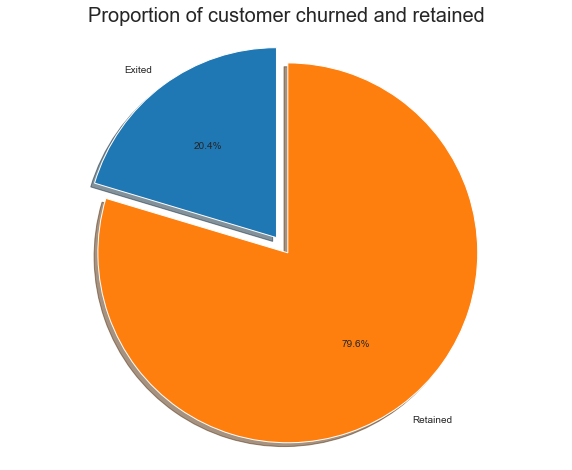

In [17]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

0    7963
1    2037
Name: Exited, dtype: int64

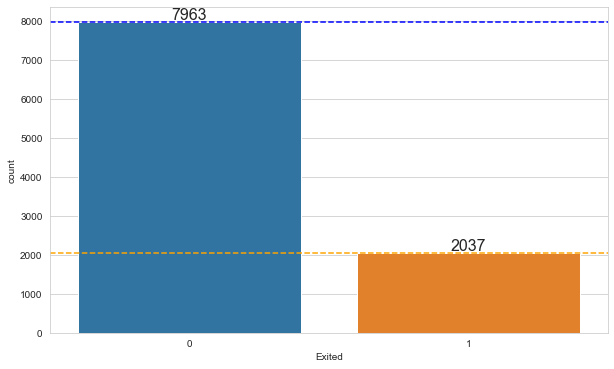

In [18]:
display(df.Exited.value_counts())
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Exited.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Exited.value_counts()[0], color='blue', linestyle='--');

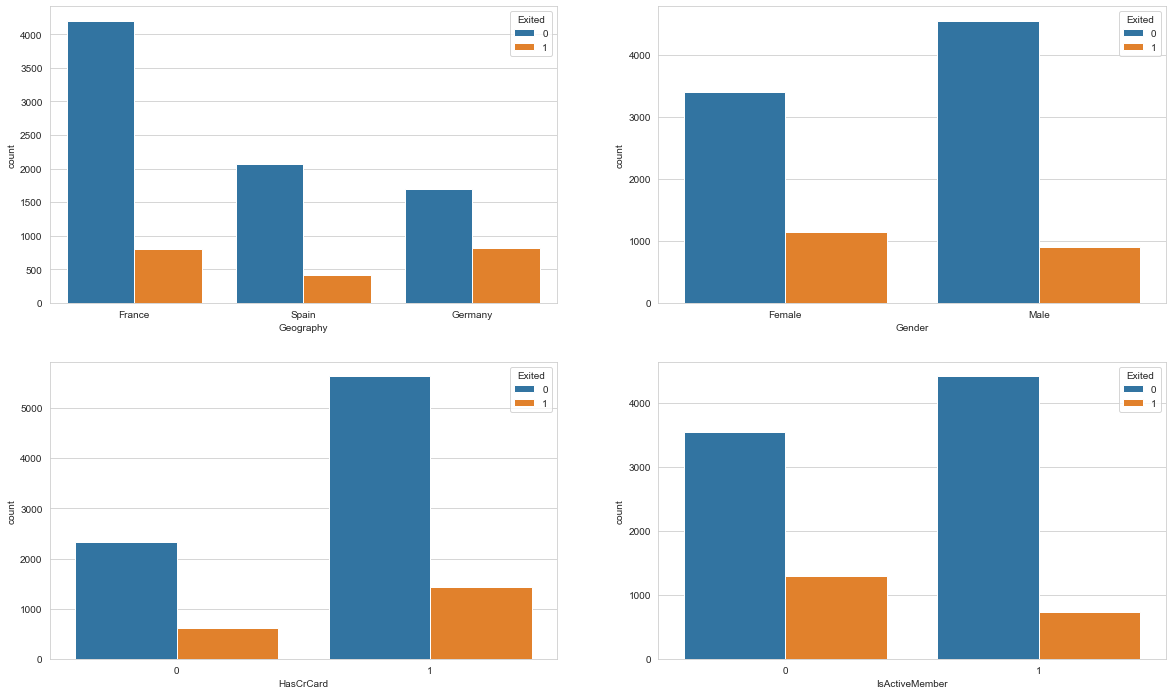

In [19]:
# We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

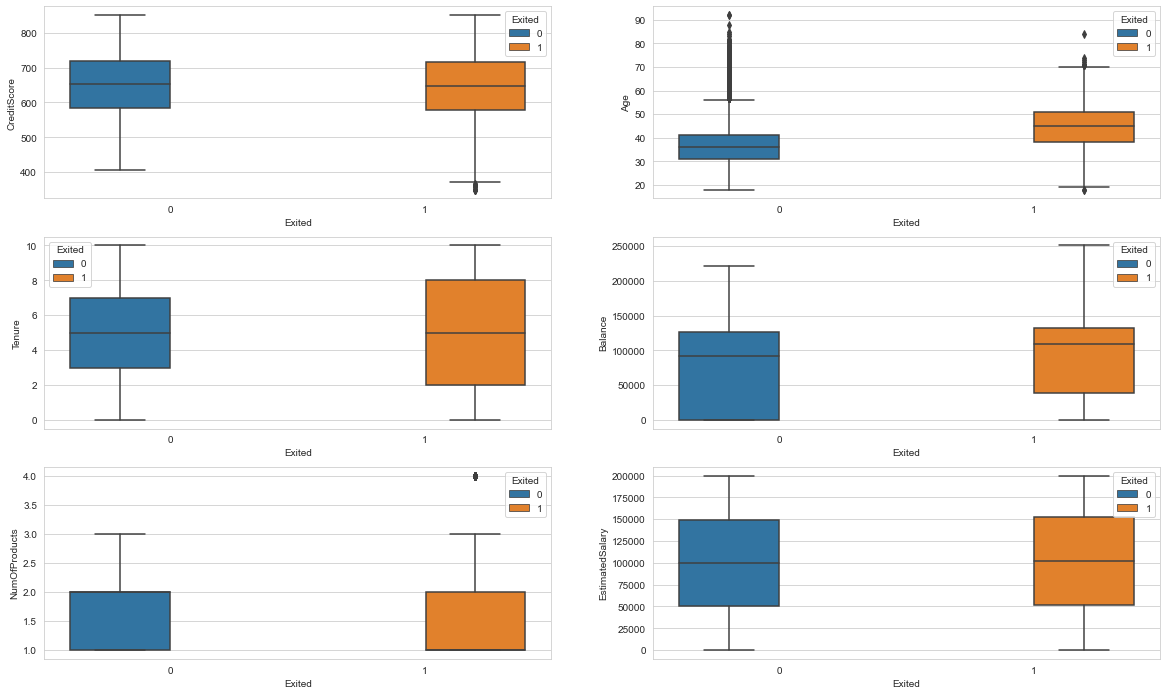

In [20]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1]);

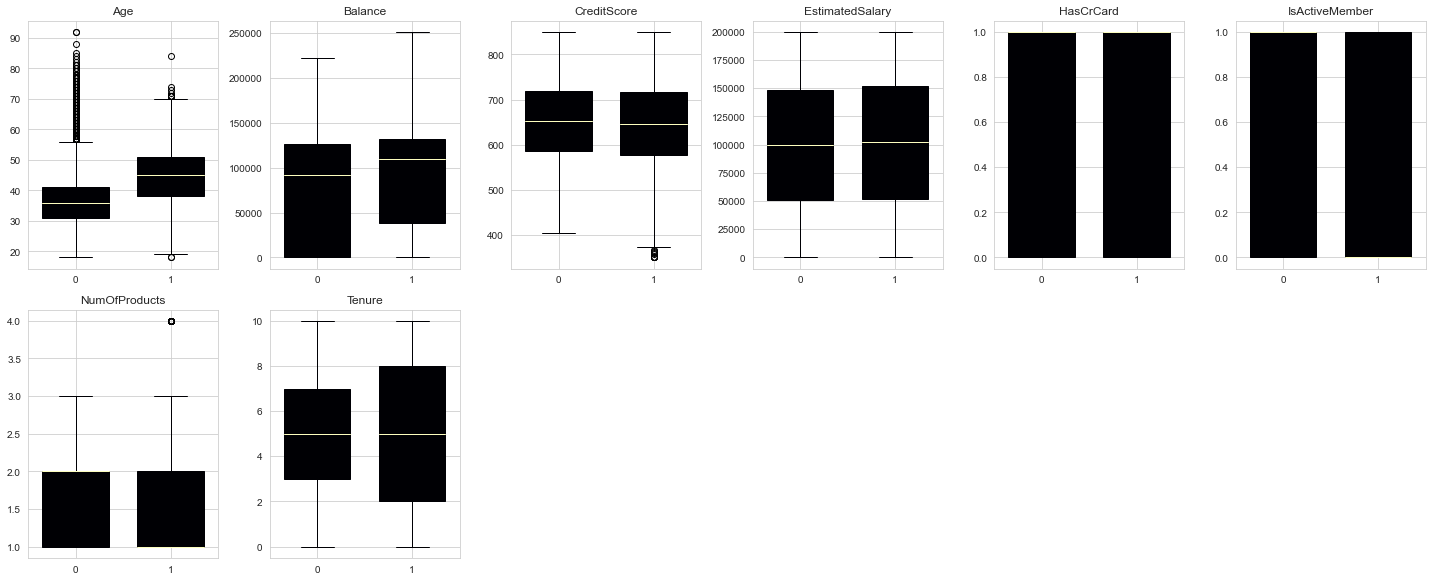

In [21]:
df.plot(kind="box",
        by="Exited", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

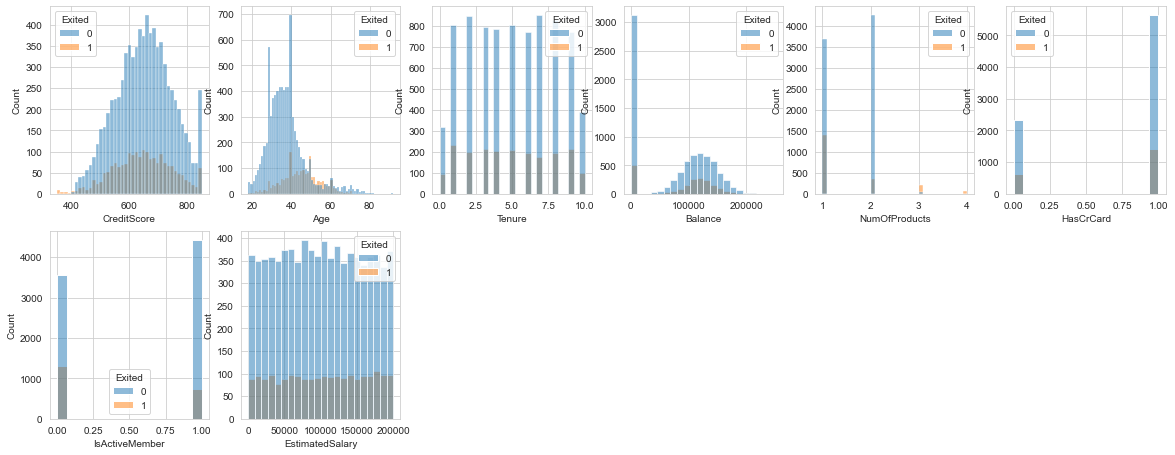

In [22]:
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Exited')

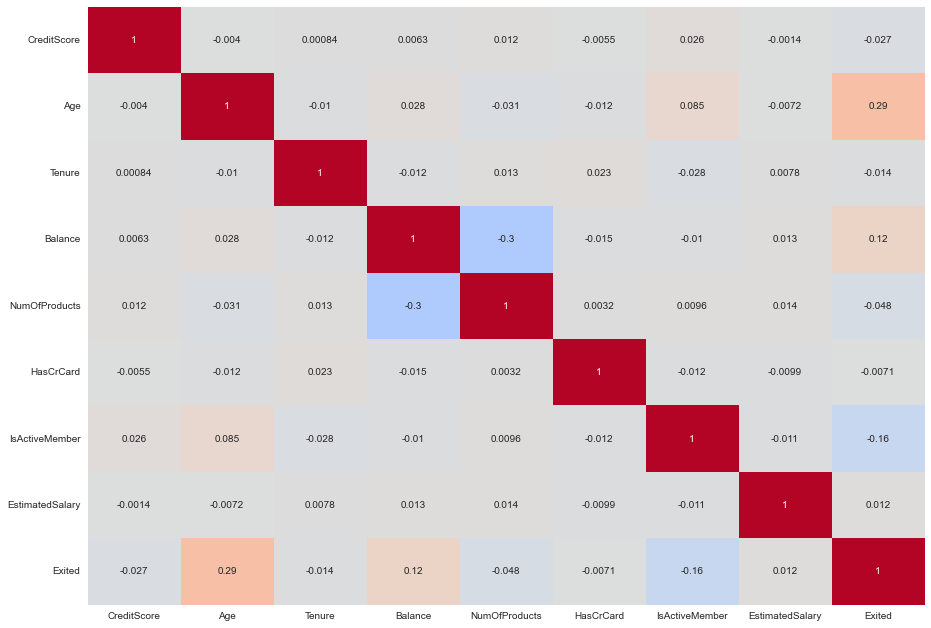

In [23]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False) #numeric_only=True
plt.show()

In [ ]:
sns.pairplot(df, hue="exited", palette="inferno", corner=True);

In [ ]:
plt.figure(figsize = (8, 7))
df.corr()['exited'].sort_values().drop("exited").plot(kind = "barh");

In [25]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [64]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,4,15701354,Boni,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.000,2,1,0,96270.640,0,0,0,1
9996,9997,15569892,Johnstone,516,35,10,57369.610,1,1,1,101699.770,0,0,0,1
9997,9998,15584532,Liu,709,36,7,0.000,1,0,1,42085.580,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.310,2,1,0,92888.520,1,1,0,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [29]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [31]:
scaler = MinMaxScaler()
# scaler = RobustScaler()

In [32]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [35]:
X_train.shape

(9000, 11)

In [36]:
X_test.shape

(1000, 11)

In [37]:
model = Sequential()

model.add(Dense(32, activation = "relu"))  # sigunt ve hiperb. e göre öğrenme daha fazla olduğu için relu kullandık.
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))  # output binary olduğu için sigmoid kullandık. 

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [38]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [39]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
254/254 [==============================] - 1s 3ms/step - loss: 0.4826 - accuracy: 0.7960 - val_loss: 0.4447 - val_accuracy: 0.8056
Epoch 2/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.4514 - accuracy: 0.8049 - val_loss: 0.4228 - val_accuracy: 0.8233
Epoch 3/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4350 - accuracy: 0.8105 - val_loss: 0.4038 - val_accuracy: 0.8400
Epoch 4/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4207 - accuracy: 0.8177 - val_loss: 0.3811 - val_accuracy: 0.8489
Epoch 5/1000
254/254 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8256 - val_loss: 0.3634 - val_accuracy: 0.8567
Epoch 6/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3887 - accuracy: 0.8344 - val_loss: 0.3420 - val_accuracy: 0.8644
Epoch 7/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3756 - accuracy: 0.8404 - val_loss: 0.3346 - val_accuracy:

# The Evaluation of Model with Default Parameters (without class_weigth)

In [40]:
model.summary()

# 1000 x 15 iterasyon oldu.
# her iterasyonda 1231 tane parametre güncellemesi yapıldı.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.483,0.796,0.445,0.806
1,0.451,0.805,0.423,0.823
2,0.435,0.810,0.404,0.840
3,0.421,0.818,0.381,0.849
4,0.406,0.826,0.363,0.857


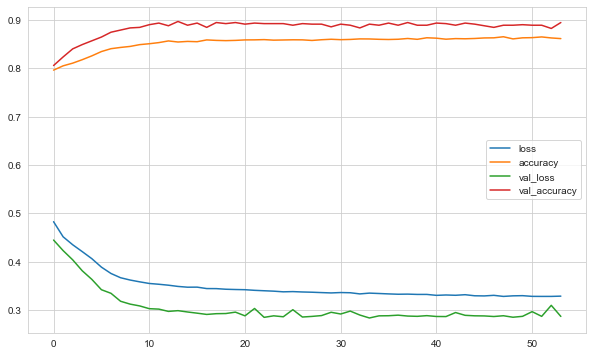

In [44]:
loss_df.plot();

In [45]:
model.evaluate(X_test, y_test, verbose=0)

[0.33876606822013855, 0.8569999933242798]

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.33876606822013855
accuracy :  0.8569999933242798


In [47]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")   # 1 olma ihtimali 0.5 ten büyükse 1 yap
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[752  44]
 [ 99 105]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.70      0.51      0.59       204

    accuracy                           0.86      1000
   macro avg       0.79      0.73      0.75      1000
weighted avg       0.85      0.86      0.85      1000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [48]:
from sklearn.utils import class_weight

In [78]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(y_train), y= y_train)

In [79]:
model_weighted = Sequential()

model_weighted.add(Dense(32, activation = "relu"))  
model_weighted.add(Dense(16, activation = "relu"))
model_weighted.add(Dense(1, activation = "sigmoid"))  

opt = Adam(lr = 0.005)

model_weighted.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [80]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

In [81]:
model_weighted.fit(x = X_train, y = y_train, 
                   validation_split = 0.1, 
                   batch_size = 32, 
                   epochs = 1000, 
                   verbose=1, 
                   callbacks = [early_stop], 
                   )

Epoch 1/1000
228/228 [==============================] - 1s 2ms/step - loss: 0.5067 - accuracy: 0.7871 - val_loss: 0.4897 - val_accuracy: 0.7827
Epoch 2/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.8010 - val_loss: 0.4669 - val_accuracy: 0.7901
Epoch 3/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8093 - val_loss: 0.4441 - val_accuracy: 0.7963
Epoch 4/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8195 - val_loss: 0.4306 - val_accuracy: 0.8160
Epoch 5/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8200 - val_loss: 0.4185 - val_accuracy: 0.8210
Epoch 6/1000
228/228 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8277 - val_loss: 0.4082 - val_accuracy: 0.8259
Epoch 7/1000
228/228 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8322 - val_loss: 0.4021 - val_accuracy:

In [ ]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

# with stratify=y

In [60]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.

X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [61]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [63]:
# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.

In [64]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 36)                432       
                                                                 
 dense_7 (Dense)             (None, 18)                666       
                                                                 
 dense_8 (Dense)             (None, 9)                 171       
                                                                 
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,279
Trainable params: 1,279
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(11, 36) dtype=float32, numpy=
 array([[-4.25214767e-02,  2.77145803e-02, -2.60531157e-01,
          2.25409269e-01, -2.28110403e-01,  3.23341966e-01,
         -1.49986833e-01,  2.01193392e-02, -9.52154696e-02,
         -2.70638466e-02,  9.06199217e-04, -3.22625041e-03,
         -2.97598600e-01, -1.38700500e-01, -8.13990533e-02,
          1.58118010e-01, -3.20633501e-01,  3.25439751e-01,
          1.09845370e-01, -1.44234151e-01, -1.36973187e-01,
         -3.22351158e-02, -7.99324811e-02, -1.61989242e-01,
          3.03363979e-01,  9.16920304e-02, -2.76865840e-01,
          2.10344255e-01,  1.49505556e-01, -8.82691145e-02,
          5.48189580e-02, -8.03625882e-02, -2.21131727e-01,
          9.54633653e-02, -2.47059762e-02, -3.35740864e-01],
        [-1.62642881e-01,  3.15352321e-01, -5.92106283e-02,
         -7.89000392e-02,  8.25196505e-04, -2.55232424e-01,
          6.22779131e-02, -2.42393315e-01,  3.58263850e-02,
          2.86779523e-01, -2.

In [66]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4864 - accuracy: 0.7964 - val_loss: 0.4597 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8058 - val_loss: 0.4282 - val_accuracy: 0.8100
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8172 - val_loss: 0.4024 - val_accuracy: 0.8111
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8322 - val_loss: 0.3732 - val_accuracy: 0.8444
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8441 - val_loss: 0.3566 - val_accuracy: 0.8500
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8514 - val_loss: 0.3407 - val_accuracy: 0.8544
Epoch 7/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3584 - accuracy: 0.8521 - val_loss: 0.3372 - val_accuracy: 0.8511

Epoch 58/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8706 - val_loss: 0.3291 - val_accuracy: 0.8622
Epoch 59/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8710 - val_loss: 0.3283 - val_accuracy: 0.8644
Epoch 60/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.8717 - val_loss: 0.3296 - val_accuracy: 0.8567
Epoch 61/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8707 - val_loss: 0.3273 - val_accuracy: 0.8656
Epoch 62/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.8719 - val_loss: 0.3439 - val_accuracy: 0.8500
Epoch 63/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8719 - val_loss: 0.3404 - val_accuracy: 0.8578
Epoch 64/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8706 - val_loss: 0.3289 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8762 - val_loss: 0.3405 - val_accuracy: 0.8667
Epoch 116/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3017 - accuracy: 0.8775 - val_loss: 0.3469 - val_accuracy: 0.8622
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.8775 - val_loss: 0.3416 - val_accuracy: 0.8578
Epoch 118/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3018 - accuracy: 0.8759 - val_loss: 0.3466 - val_accuracy: 0.8622
Epoch 119/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.8757 - val_loss: 0.3431 - val_accuracy: 0.8600
Epoch 120/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8733 - val_loss: 0.3563 - val_accuracy: 0.8511
Epoch 121/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8767 - val_loss: 0.3418 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 0.8883 - val_loss: 0.3701 - val_accuracy: 0.8478
Epoch 228/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2817 - accuracy: 0.8852 - val_loss: 0.3718 - val_accuracy: 0.8511
Epoch 229/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8878 - val_loss: 0.3794 - val_accuracy: 0.8467
Epoch 230/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8863 - val_loss: 0.3718 - val_accuracy: 0.8522
Epoch 231/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8847 - val_loss: 0.3743 - val_accuracy: 0.8522
Epoch 232/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8860 - val_loss: 0.3794 - val_accuracy: 0.8511
Epoch 233/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2781 - accuracy: 0.8894 - val_loss: 0.3765 - val_accuracy: 0.8489

254/254 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8926 - val_loss: 0.4190 - val_accuracy: 0.8444
Epoch 340/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8952 - val_loss: 0.4020 - val_accuracy: 0.8500
Epoch 341/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.8947 - val_loss: 0.4119 - val_accuracy: 0.8389
Epoch 342/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.8944 - val_loss: 0.4013 - val_accuracy: 0.8522
Epoch 343/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8937 - val_loss: 0.4071 - val_accuracy: 0.8456
Epoch 344/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2623 - accuracy: 0.8932 - val_loss: 0.4040 - val_accuracy: 0.8433
Epoch 345/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2628 - accuracy: 0.8942 - val_loss: 0.4031 - val_accuracy: 0.8489

254/254 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8968 - val_loss: 0.4333 - val_accuracy: 0.8378
Epoch 452/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8956 - val_loss: 0.4234 - val_accuracy: 0.8433
Epoch 453/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.8951 - val_loss: 0.4257 - val_accuracy: 0.8500
Epoch 454/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2507 - accuracy: 0.8979 - val_loss: 0.4282 - val_accuracy: 0.8444
Epoch 455/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2490 - accuracy: 0.8980 - val_loss: 0.4356 - val_accuracy: 0.8333
Epoch 456/600
254/254 [==============================] - 1s 2ms/step - loss: 0.2475 - accuracy: 0.8988 - val_loss: 0.4211 - val_accuracy: 0.8456
Epoch 457/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.8972 - val_loss: 0.4316 - val_accuracy: 0.8333

254/254 [==============================] - 0s 2ms/step - loss: 0.2361 - accuracy: 0.9020 - val_loss: 0.4714 - val_accuracy: 0.8400
Epoch 564/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2380 - accuracy: 0.9010 - val_loss: 0.4665 - val_accuracy: 0.8389
Epoch 565/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2400 - accuracy: 0.9005 - val_loss: 0.4823 - val_accuracy: 0.8356
Epoch 566/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.9001 - val_loss: 0.4627 - val_accuracy: 0.8389
Epoch 567/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2363 - accuracy: 0.9021 - val_loss: 0.4699 - val_accuracy: 0.8333
Epoch 568/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.9021 - val_loss: 0.4638 - val_accuracy: 0.8378
Epoch 569/600
254/254 [==============================] - 0s 2ms/step - loss: 0.2382 - accuracy: 0.9016 - val_loss: 0.4613 - val_accuracy: 0.8444

In [67]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.486,0.796,0.460,0.797
1,0.448,0.806,0.428,0.810
2,0.423,0.817,0.402,0.811
3,0.396,0.832,0.373,0.844
4,0.381,0.844,0.357,0.850


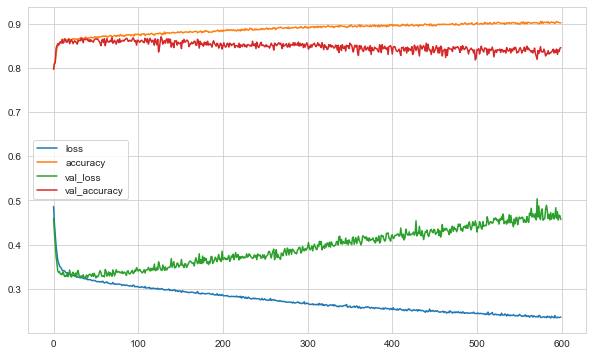

In [68]:
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10) iceriye
plt.show()

In [69]:
model.evaluate(X_test, y_test, verbose=0)

[0.5080493092536926, 0.847000002861023]

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [82]:
model_weighted.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                384       
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________


In [83]:
loss_df = pd.DataFrame(model_weighted.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.507,0.787,0.490,0.783
1,0.458,0.801,0.467,0.790
2,0.441,0.809,0.444,0.796
3,0.425,0.819,0.431,0.816
4,0.414,0.820,0.419,0.821


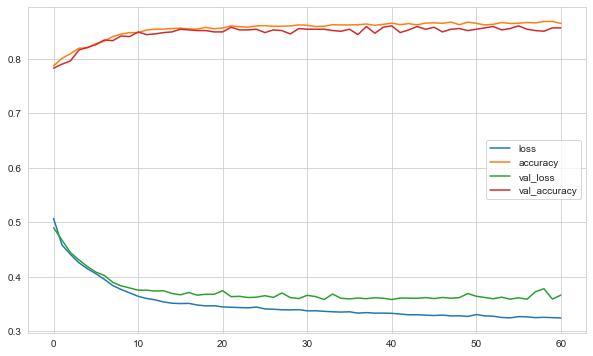

In [84]:
loss_df.plot();

In [85]:
model_weighted.evaluate(X_test, y_test, verbose=0)

[0.36405763030052185, 0.8479999899864197]

In [86]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36405763030052185
accuracy :  0.8479999899864197


In [87]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 930us/step
[[738  58]
 [ 94 110]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       796
           1       0.65      0.54      0.59       204

    accuracy                           0.85      1000
   macro avg       0.77      0.73      0.75      1000
weighted avg       0.84      0.85      0.84      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [91]:
model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.009)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :



model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [92]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [93]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.8001 - val_loss: 0.4332 - val_accuracy: 0.8067
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8306 - val_loss: 0.3750 - val_accuracy: 0.8344
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8517 - val_loss: 0.3422 - val_accuracy: 0.8611
Epoch 4/600
254/254 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8547 - val_loss: 0.3465 - val_accuracy: 0.8589
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8551 - val_loss: 0.3502 - val_accuracy: 0.8633
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3570 - accuracy: 0.8543 - val_loss: 0.3362 - val_accuracy: 0.8622
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3530 - accuracy: 0.8556 - val_loss: 0.3327 - val_accuracy: 0.8656

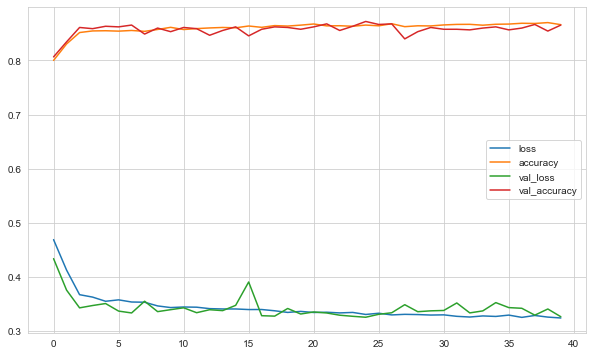

In [94]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [95]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3505566120147705
accuracy :  0.8529999852180481


In [96]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 906us/step
[[758  38]
 [109  95]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.71      0.47      0.56       204

    accuracy                           0.85      1000
   macro avg       0.79      0.71      0.74      1000
weighted avg       0.84      0.85      0.84      1000



### Add Dropout Layer

In [97]:
from tensorflow.keras.layers import Dropout

In [99]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [100]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
)

Epoch 1/600
254/254 [==============================] - 1s 2ms/step - loss: 0.5713 - accuracy: 0.7749 - val_loss: 0.4979 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7963 - val_loss: 0.4748 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7963 - val_loss: 0.4729 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4993 - accuracy: 0.7963 - val_loss: 0.4632 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7963 - val_loss: 0.4643 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7963 - val_loss: 0.4610 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7963 - val_loss: 0.4526 - val_accuracy: 0.7967

Epoch 58/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8304 - val_loss: 0.3450 - val_accuracy: 0.8522
Epoch 59/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8265 - val_loss: 0.3451 - val_accuracy: 0.8556
Epoch 60/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4002 - accuracy: 0.8311 - val_loss: 0.3522 - val_accuracy: 0.8467
Epoch 61/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8325 - val_loss: 0.3473 - val_accuracy: 0.8533
Epoch 62/600
254/254 [==============================] - 1s 2ms/step - loss: 0.4021 - accuracy: 0.8291 - val_loss: 0.3504 - val_accuracy: 0.8533
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8333 - val_loss: 0.3487 - val_accuracy: 0.8522
Epoch 64/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8338 - val_loss: 0.3460 - val_accuracy:

Epoch 115/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8384 - val_loss: 0.3400 - val_accuracy: 0.8600
Epoch 116/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3896 - accuracy: 0.8357 - val_loss: 0.3385 - val_accuracy: 0.8644
Epoch 117/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8370 - val_loss: 0.3423 - val_accuracy: 0.8556
Epoch 118/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8372 - val_loss: 0.3461 - val_accuracy: 0.8533
Epoch 119/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8380 - val_loss: 0.3383 - val_accuracy: 0.8644
Epoch 120/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8375 - val_loss: 0.3462 - val_accuracy: 0.8567
Epoch 121/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8360 - val_loss: 0.3408 - val_ac

254/254 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8453 - val_loss: 0.3297 - val_accuracy: 0.8589
Epoch 228/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8464 - val_loss: 0.3331 - val_accuracy: 0.8600
Epoch 229/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8459 - val_loss: 0.3353 - val_accuracy: 0.8578
Epoch 230/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8406 - val_loss: 0.3402 - val_accuracy: 0.8589
Epoch 231/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8453 - val_loss: 0.3334 - val_accuracy: 0.8656
Epoch 232/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3835 - accuracy: 0.8417 - val_loss: 0.3313 - val_accuracy: 0.8667
Epoch 233/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8458 - val_loss: 0.3343 - val_accuracy: 0.8644

254/254 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8421 - val_loss: 0.3369 - val_accuracy: 0.8556
Epoch 340/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8407 - val_loss: 0.3312 - val_accuracy: 0.8611
Epoch 341/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.8404 - val_loss: 0.3352 - val_accuracy: 0.8611
Epoch 342/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8477 - val_loss: 0.3394 - val_accuracy: 0.8589
Epoch 343/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3738 - accuracy: 0.8428 - val_loss: 0.3407 - val_accuracy: 0.8600
Epoch 344/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3706 - accuracy: 0.8463 - val_loss: 0.3390 - val_accuracy: 0.8633
Epoch 345/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3802 - accuracy: 0.8437 - val_loss: 0.3403 - val_accuracy: 0.8589

254/254 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8458 - val_loss: 0.3361 - val_accuracy: 0.8600
Epoch 452/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.8449 - val_loss: 0.3301 - val_accuracy: 0.8700
Epoch 453/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8443 - val_loss: 0.3400 - val_accuracy: 0.8567
Epoch 454/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8426 - val_loss: 0.3340 - val_accuracy: 0.8644
Epoch 455/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8454 - val_loss: 0.3340 - val_accuracy: 0.8589
Epoch 456/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8405 - val_loss: 0.3480 - val_accuracy: 0.8522
Epoch 457/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3714 - accuracy: 0.8452 - val_loss: 0.3327 - val_accuracy: 0.8689

254/254 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8411 - val_loss: 0.3327 - val_accuracy: 0.8656
Epoch 564/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3794 - accuracy: 0.8417 - val_loss: 0.3368 - val_accuracy: 0.8622
Epoch 565/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8485 - val_loss: 0.3426 - val_accuracy: 0.8589
Epoch 566/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8467 - val_loss: 0.3337 - val_accuracy: 0.8678
Epoch 567/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8427 - val_loss: 0.3376 - val_accuracy: 0.8567
Epoch 568/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8469 - val_loss: 0.3380 - val_accuracy: 0.8567
Epoch 569/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3737 - accuracy: 0.8478 - val_loss: 0.3401 - val_accuracy: 0.8589

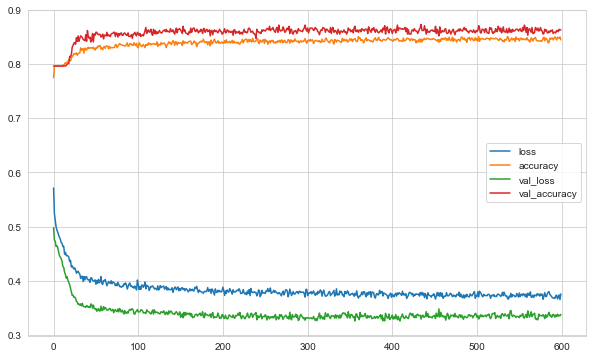

In [101]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [102]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3626616299152374
accuracy :  0.8500000238418579


In [103]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 931us/step
[[775  21]
 [129  75]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.78      0.37      0.50       204

    accuracy                           0.85      1000
   macro avg       0.82      0.67      0.71      1000
weighted avg       0.84      0.85      0.83      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [104]:
model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [106]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [105]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
254/254 [==============================] - 2s 2ms/step - loss: 0.6828 - accuracy: 0.6767 - val_loss: 0.6313 - val_accuracy: 0.7967
Epoch 2/600
254/254 [==============================] - 0s 2ms/step - loss: 0.6070 - accuracy: 0.7963 - val_loss: 0.5719 - val_accuracy: 0.7967
Epoch 3/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7964 - val_loss: 0.5104 - val_accuracy: 0.7967
Epoch 4/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5201 - accuracy: 0.7963 - val_loss: 0.4907 - val_accuracy: 0.7967
Epoch 5/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7963 - val_loss: 0.4828 - val_accuracy: 0.7967
Epoch 6/600
254/254 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7981 - val_loss: 0.4720 - val_accuracy: 0.7967
Epoch 7/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.7973 - val_loss: 0.4683 - val_accuracy: 0.7967

Epoch 58/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8375 - val_loss: 0.3538 - val_accuracy: 0.8500
Epoch 59/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8362 - val_loss: 0.3512 - val_accuracy: 0.8522
Epoch 60/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8352 - val_loss: 0.3474 - val_accuracy: 0.8567
Epoch 61/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8374 - val_loss: 0.3446 - val_accuracy: 0.8578
Epoch 62/600
254/254 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8380 - val_loss: 0.3472 - val_accuracy: 0.8533
Epoch 63/600
254/254 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8344 - val_loss: 0.3405 - val_accuracy: 0.8611
Epoch 64/600
254/254 [==============================] - 1s 2ms/step - loss: 0.3962 - accuracy: 0.8386 - val_loss: 0.3483 - val_accuracy:

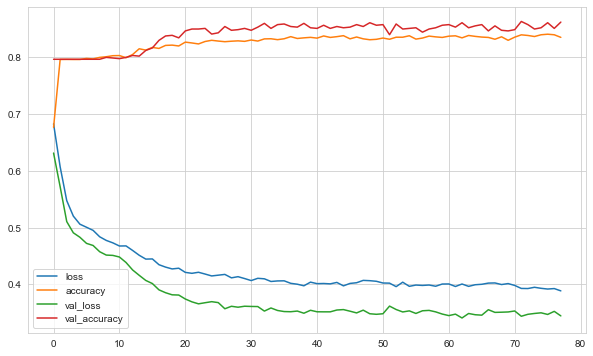

In [107]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [108]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3680770993232727
accuracy :  0.8450000286102295


In [109]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 898us/step
[[771  25]
 [130  74]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       796
           1       0.75      0.36      0.49       204

    accuracy                           0.84      1000
   macro avg       0.80      0.67      0.70      1000
weighted avg       0.83      0.84      0.82      1000



#### Monitor the "val_recall" as metric

In [128]:
model = Sequential()

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"])

In [129]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=15)

In [131]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=200,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/200
57/57 [==============================] - 1s 4ms/step - loss: 0.6726 - recall: 0.2476 - val_loss: 0.5838 - val_recall: 0.0057
Epoch 2/200
57/57 [==============================] - 0s 2ms/step - loss: 0.5371 - recall: 0.0000e+00 - val_loss: 0.5225 - val_recall: 0.0000e+00
Epoch 3/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4979 - recall: 0.0000e+00 - val_loss: 0.5035 - val_recall: 0.0000e+00
Epoch 4/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4797 - recall: 0.0000e+00 - val_loss: 0.4942 - val_recall: 0.0000e+00
Epoch 5/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4708 - recall: 0.0122 - val_loss: 0.4874 - val_recall: 0.0170
Epoch 6/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4646 - recall: 0.0326 - val_loss: 0.4820 - val_recall: 0.0398
Epoch 7/200
57/57 [==============================] - 0s 2ms/step - loss: 0.4596 - recall: 0.0631 - val_loss: 0.4768 - val_recall: 0.0625
Epoch 8/200
57/57

57/57 [==============================] - 0s 2ms/step - loss: 0.3378 - recall: 0.4539 - val_loss: 0.3634 - val_recall: 0.4602
Epoch 120/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3378 - recall: 0.4593 - val_loss: 0.3631 - val_recall: 0.4659
Epoch 121/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3379 - recall: 0.4607 - val_loss: 0.3628 - val_recall: 0.4830
Epoch 122/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3373 - recall: 0.4586 - val_loss: 0.3648 - val_recall: 0.4432
Epoch 123/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3374 - recall: 0.4613 - val_loss: 0.3641 - val_recall: 0.4489
Epoch 124/200
57/57 [==============================] - 0s 2ms/step - loss: 0.3374 - recall: 0.4579 - val_loss: 0.3628 - val_recall: 0.4716
Epoch 124: early stopping


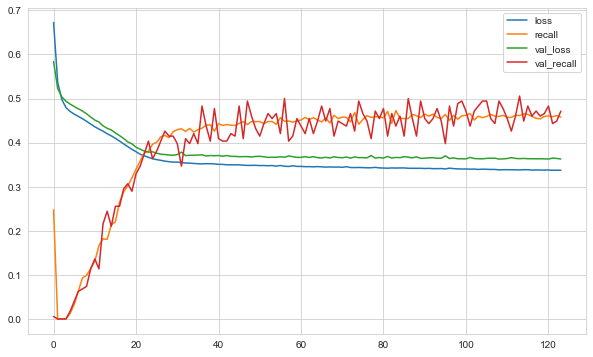

In [132]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot() #subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [133]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.3522031903266907
recall :  0.45588234066963196


In [134]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 878us/step
[[759  37]
 [111  93]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       796
           1       0.72      0.46      0.56       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



## Optuna

In [146]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.regularizers import l1, l2, L1L2

In [136]:
import optuna

In [137]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [147]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [148]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-16 14:06:51,347] A new study created in memory with name: no-name-126f5229-b089-4692-8ed7-3f03c14912b0


Restoring model weights from the end of the best epoch: 166.
Epoch 181: early stopping


[I 2023-05-16 14:07:28,945] Trial 0 finished with value: 0.8330000042915344 and parameters: {'n_units1': 74, 'n_units2': 18, 'n_units3': 29, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 0.0002667130215237325, 'regularizer1': 7.757171507516562e-05, 'regularizer2': 0.0008179474730687397, 'dropout': 0, 'w0': 0.312583415488339, 'w1': 0.15095795641428414}. Best is trial 0 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-05-16 14:07:34,853] Trial 1 finished with value: 0.20399999618530273 and parameters: {'n_units1': 98, 'n_units2': 44, 'n_units3': 48, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0012462882022815634, 'regularizer1': 0.0004198668407230974, 'regularizer2': 1.1050491497744907e-05, 'dropout': 0.3, 'w0': 0.028776385135559426, 'w1': 0.2389344324777953}. Best is trial 0 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 13.
Epoch 28: early stopping


[I 2023-05-16 14:07:41,859] Trial 2 finished with value: 0.7960000038146973 and parameters: {'n_units1': 82, 'n_units2': 31, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.5607755224687155e-05, 'regularizer1': 1.747790658630606e-05, 'regularizer2': 0.00046654557929984574, 'dropout': 0, 'w0': 1.6662258070026024, 'w1': 0.18989101554242926}. Best is trial 0 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 77.
Epoch 92: early stopping


[I 2023-05-16 14:08:01,748] Trial 3 finished with value: 0.8119999766349792 and parameters: {'n_units1': 95, 'n_units2': 47, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0004586507582980204, 'regularizer1': 0.00024021111324025462, 'regularizer2': 1.4471121901728274e-05, 'dropout': 0, 'w0': 0.3079061417908684, 'w1': 0.09056158070544644}. Best is trial 0 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 62.
Epoch 77: early stopping


[I 2023-05-16 14:08:21,646] Trial 4 finished with value: 0.7960000038146973 and parameters: {'n_units1': 64, 'n_units2': 18, 'n_units3': 25, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00013880992587423093, 'regularizer1': 0.000720219493459469, 'regularizer2': 0.00032303891624225735, 'dropout': 0.3, 'w0': 0.10347302823078657, 'w1': 0.30891548469518426}. Best is trial 0 with value: 0.8330000042915344.
[I 2023-05-16 14:12:06,874] Trial 5 finished with value: 0.7960000038146973 and parameters: {'n_units1': 85, 'n_units2': 62, 'n_units3': 45, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002720853284105518, 'regularizer1': 0.0005472292279898259, 'regularizer2': 2.5868588754691613e-05, 'dropout': 0.3, 'w0': 0.02342777499719839, 'w1': 0.036289547614774466}. Best is trial 0 with value: 0.8330000042915344.
[I 2023-05-16 14:15:57,083] Trial 6 finished with value: 0.7960000038146973 and parameters: {'n_units1': 68, 'n_units2': 39, '

Restoring model weights from the end of the best epoch: 41.
Epoch 56: early stopping


[I 2023-05-16 14:16:16,315] Trial 7 finished with value: 0.7960000038146973 and parameters: {'n_units1': 124, 'n_units2': 47, 'n_units3': 28, 'optimizer': <class 'keras.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.005329128220362113, 'regularizer1': 0.000512512779887862, 'regularizer2': 0.00030918321154443386, 'dropout': 0.5, 'w0': 0.12205064532960211, 'w1': 0.01106862615419114}. Best is trial 0 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 2.
Epoch 17: early stopping


[I 2023-05-16 14:16:24,523] Trial 8 finished with value: 0.7960000038146973 and parameters: {'n_units1': 82, 'n_units2': 50, 'n_units3': 32, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 9.31467169977393e-05, 'regularizer1': 0.000981895900408862, 'regularizer2': 9.891417995885131e-05, 'dropout': 0.5, 'w0': 4.880336517057023, 'w1': 0.056659296411188415}. Best is trial 0 with value: 0.8330000042915344.


Restoring model weights from the end of the best epoch: 635.
Epoch 650: early stopping


[I 2023-05-16 14:19:28,267] Trial 9 finished with value: 0.847000002861023 and parameters: {'n_units1': 67, 'n_units2': 24, 'n_units3': 33, 'optimizer': <class 'keras.optimizers.rmsprop.RMSprop'>, 'learning_rate': 2.7195563580747184e-05, 'regularizer1': 1.5590225058676998e-05, 'regularizer2': 0.0007500689103673008, 'dropout': 0.3, 'w0': 0.29089498425816923, 'w1': 0.48877278627175036}. Best is trial 9 with value: 0.847000002861023.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-05-16 14:19:37,504] Trial 10 finished with value: 0.8050000071525574 and parameters: {'n_units1': 116, 'n_units2': 29, 'n_units3': 63, 'optimizer': <class 'keras.optimizers.nadam.Nadam'>, 'learning_rate': 0.04057894671576125, 'regularizer1': 1.1156976137835174e-05, 'regularizer2': 0.0007739614433852077, 'dropout': 0.3, 'w0': 1.0000369275405852, 'w1': 1.0943993347316228}. Best is trial 9 with value: 0.847000002861023.
[I 2023-05-16 14:22:25,913] Trial 11 finished with value: 0.8519999980926514 and parameters: {'n_units1': 72, 'n_units2': 17, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 2.138316756966499e-05, 'regularizer1': 4.2089202644788777e-05, 'regularizer2': 0.0009901678996184094, 'dropout': 0, 'w0': 0.3452598833651879, 'w1': 0.5761065418303584}. Best is trial 11 with value: 0.8519999980926514.
[I 2023-05-16 14:25:15,295] Trial 12 finished with value: 0.8529999852180481 and parameters: {'n_units1': 75, 'n_units2': 26, 'n_units3': 16, '

Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-16 14:28:06,500] Trial 14 finished with value: 0.20399999618530273 and parameters: {'n_units1': 76, 'n_units2': 26, 'n_units3': 16, 'optimizer': <class 'keras.optimizers.adam.Adam'>, 'learning_rate': 4.4599465455127773e-05, 'regularizer1': 3.7520858168345894e-05, 'regularizer2': 0.00019754337684052076, 'dropout': 0, 'w0': 0.08197777334093515, 'w1': 1.6483513467608624}. Best is trial 12 with value: 0.8529999852180481.


{'n_units1': 75,
 'n_units2': 26,
 'n_units3': 16,
 'optimizer': keras.optimizers.adam.Adam,
 'learning_rate': 1.3224889261945755e-05,
 'regularizer1': 3.460064109893399e-05,
 'regularizer2': 0.0008611200695673218,
 'dropout': 0,
 'w0': 0.5607169760753687,
 'w1': 0.8103431629636956}

In [149]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)


model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
127/127 [==============================] - 1s 3ms/step - loss: 0.7708 - Accuracy: 0.6341 - val_loss: 0.7607 - val_Accuracy: 0.7533
Epoch 2/500
127/127 [==============================] - 0s 2ms/step - loss: 0.7530 - Accuracy: 0.7678 - val_loss: 0.7436 - val_Accuracy: 0.7889
Epoch 3/500
127/127 [==============================] - 0s 2ms/step - loss: 0.7365 - Accuracy: 0.7930 - val_loss: 0.7282 - val_Accuracy: 0.7967
Epoch 4/500
127/127 [==============================] - 0s 2ms/step - loss: 0.7218 - Accuracy: 0.7960 - val_loss: 0.7146 - val_Accuracy: 0.7967
Epoch 5/500
127/127 [==============================] - 0s 2ms/step - loss: 0.7085 - Accuracy: 0.7963 - val_loss: 0.7019 - val_Accuracy: 0.7967
Epoch 6/500
127/127 [==============================] - 0s 2ms/step - loss: 0.6959 - Accuracy: 0.7963 - val_loss: 0.6898 - val_Accuracy: 0.7967
Epoch 7/500
127/127 [==============================] - 0s 2ms/step - loss: 0.6834 - Accuracy: 0.7963 - val_loss: 0.6772 - val_Accuracy: 0.7967

Epoch 58/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5316 - Accuracy: 0.7963 - val_loss: 0.5312 - val_Accuracy: 0.7967
Epoch 59/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5307 - Accuracy: 0.7963 - val_loss: 0.5303 - val_Accuracy: 0.7967
Epoch 60/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5297 - Accuracy: 0.7963 - val_loss: 0.5294 - val_Accuracy: 0.7967
Epoch 61/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5288 - Accuracy: 0.7963 - val_loss: 0.5285 - val_Accuracy: 0.7967
Epoch 62/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5280 - Accuracy: 0.7965 - val_loss: 0.5277 - val_Accuracy: 0.7978
Epoch 63/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5271 - Accuracy: 0.7965 - val_loss: 0.5269 - val_Accuracy: 0.7978
Epoch 64/500
127/127 [==============================] - 0s 2ms/step - loss: 0.5263 - Accuracy: 0.7964 - val_loss: 0.5261 - val_Accuracy:

Epoch 115/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4958 - Accuracy: 0.8111 - val_loss: 0.4946 - val_Accuracy: 0.8078
Epoch 116/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4954 - Accuracy: 0.8111 - val_loss: 0.4940 - val_Accuracy: 0.8089
Epoch 117/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4949 - Accuracy: 0.8109 - val_loss: 0.4936 - val_Accuracy: 0.8089
Epoch 118/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4944 - Accuracy: 0.8111 - val_loss: 0.4931 - val_Accuracy: 0.8089
Epoch 119/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4939 - Accuracy: 0.8116 - val_loss: 0.4926 - val_Accuracy: 0.8100
Epoch 120/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4935 - Accuracy: 0.8117 - val_loss: 0.4921 - val_Accuracy: 0.8111
Epoch 121/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4930 - Accuracy: 0.8122 - val_loss: 0.4917 - val_Ac

127/127 [==============================] - 0s 2ms/step - loss: 0.4600 - Accuracy: 0.8244 - val_loss: 0.4576 - val_Accuracy: 0.8133
Epoch 228/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4599 - Accuracy: 0.8252 - val_loss: 0.4574 - val_Accuracy: 0.8144
Epoch 229/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4596 - Accuracy: 0.8248 - val_loss: 0.4571 - val_Accuracy: 0.8144
Epoch 230/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4593 - Accuracy: 0.8253 - val_loss: 0.4569 - val_Accuracy: 0.8133
Epoch 231/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4591 - Accuracy: 0.8253 - val_loss: 0.4566 - val_Accuracy: 0.8133
Epoch 232/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4588 - Accuracy: 0.8256 - val_loss: 0.4564 - val_Accuracy: 0.8144
Epoch 233/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4586 - Accuracy: 0.8258 - val_loss: 0.4561 - val_Accuracy: 0.8133

127/127 [==============================] - 0s 2ms/step - loss: 0.4335 - Accuracy: 0.8368 - val_loss: 0.4292 - val_Accuracy: 0.8333
Epoch 340/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4332 - Accuracy: 0.8367 - val_loss: 0.4290 - val_Accuracy: 0.8344
Epoch 341/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4330 - Accuracy: 0.8367 - val_loss: 0.4287 - val_Accuracy: 0.8344
Epoch 342/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4327 - Accuracy: 0.8365 - val_loss: 0.4284 - val_Accuracy: 0.8367
Epoch 343/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4325 - Accuracy: 0.8368 - val_loss: 0.4282 - val_Accuracy: 0.8367
Epoch 344/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4323 - Accuracy: 0.8369 - val_loss: 0.4279 - val_Accuracy: 0.8356
Epoch 345/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4321 - Accuracy: 0.8370 - val_loss: 0.4277 - val_Accuracy: 0.8356

127/127 [==============================] - 0s 2ms/step - loss: 0.4120 - Accuracy: 0.8490 - val_loss: 0.4061 - val_Accuracy: 0.8467
Epoch 452/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4119 - Accuracy: 0.8490 - val_loss: 0.4060 - val_Accuracy: 0.8467
Epoch 453/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4118 - Accuracy: 0.8496 - val_loss: 0.4058 - val_Accuracy: 0.8467
Epoch 454/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4116 - Accuracy: 0.8496 - val_loss: 0.4057 - val_Accuracy: 0.8467
Epoch 455/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4115 - Accuracy: 0.8500 - val_loss: 0.4056 - val_Accuracy: 0.8456
Epoch 456/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4113 - Accuracy: 0.8495 - val_loss: 0.4054 - val_Accuracy: 0.8456
Epoch 457/500
127/127 [==============================] - 0s 2ms/step - loss: 0.4112 - Accuracy: 0.8494 - val_loss: 0.4053 - val_Accuracy: 0.8456

In [150]:
history = model.history.history

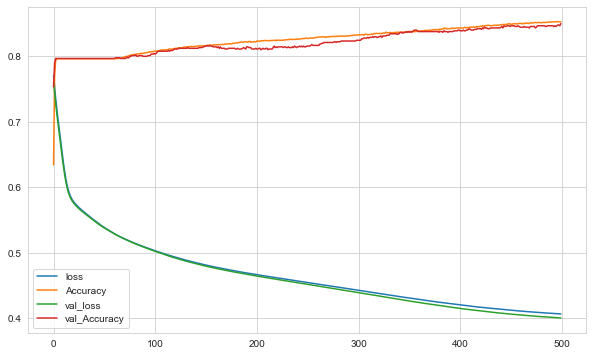

In [151]:
loss_df = pd.DataFrame(history)
loss_df.plot() #subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10)
plt.show()

In [152]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 984us/step
[[765  31]
 [124  80]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       796
           1       0.72      0.39      0.51       204

    accuracy                           0.84      1000
   macro avg       0.79      0.68      0.71      1000
weighted avg       0.83      0.84      0.83      1000



In [153]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

32/32 [==============================] - 0s 865us/step


NameError: name 'RocCurveDisplay' is not defined

In [154]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4200097620487213
accuracy:  0.8450000286102295


In [155]:
roc_auc_score(y_test, y_pred_proba)

0.8325943442703715

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___